# Displaying the Timeline of the Scheduler

In [32]:
# Collect the logs of the events of scheduled pods
!kubectl get events -A --sort-by=.metadata.creationTimestamp --field-selector reason=Scheduled -o json > temp.log

In [40]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [33]:
with open('temp.log', 'r') as file:
    data = json.load(file)

In [34]:
data['items'][-1]

{'action': 'Binding',
 'apiVersion': 'v1',
 'eventTime': '2025-04-02T13:39:58.759133Z',
 'firstTimestamp': None,
 'involvedObject': {'kind': 'Pod',
  'name': 'pi-2000-w4kpt',
  'namespace': 'basic-sched',
  'uid': '3783ef51-da8e-4dd2-9036-7ce3557467a1'},
 'kind': 'Event',
 'lastTimestamp': None,
 'message': 'Successfully assigned basic-sched/pi-2000-w4kpt to dev-k8s-lc869-08',
 'metadata': {'annotations': {'scheduler/nanoseconds': '199814210'},
  'creationTimestamp': '2025-04-02T13:39:58Z',
  'generateName': 'pi-2000-w4kpt-',
  'name': 'pi-2000-w4kpt-f67bs',
  'namespace': 'basic-sched',
  'resourceVersion': '9232461',
  'uid': '84c18b92-0267-4aa0-9c3f-ebd9564433f8'},
 'reason': 'Scheduled',
 'reportingComponent': 'basic-sched',
 'reportingInstance': 'basic-sched-dev-k8s-lc869-00',
 'source': {},
 'type': 'Normal'}

In [35]:
# Filter out the scheduling events that weren't carried out by our scheduler
sched_name = 'basic-sched'
basic_sched_events = [ x for x in data['items'] if  x['reportingComponent'] == sched_name]

In [36]:
# Select the most recent events
latest = 10
basic_sched_events = basic_sched_events[-10:]

In [37]:
basic_sched_events

[{'action': 'Binding',
  'apiVersion': 'v1',
  'eventTime': '2025-04-02T13:39:56.801929Z',
  'firstTimestamp': None,
  'involvedObject': {'kind': 'Pod',
   'name': 'pi-2000-4x5kc',
   'namespace': 'basic-sched',
   'uid': '15aa90d5-62cd-408a-8b2b-c5fbe8d7ba04'},
  'kind': 'Event',
  'lastTimestamp': None,
  'message': 'Successfully assigned basic-sched/pi-2000-4x5kc to dev-k8s-lc869-07',
  'metadata': {'annotations': {'scheduler/nanoseconds': '9770466'},
   'creationTimestamp': '2025-04-02T13:39:56Z',
   'generateName': 'pi-2000-4x5kc-',
   'name': 'pi-2000-4x5kc-czrww',
   'namespace': 'basic-sched',
   'resourceVersion': '9232394',
   'uid': '6b3cf87f-5b4e-4494-bdf2-e1c3778d31e7'},
  'reason': 'Scheduled',
  'reportingComponent': 'basic-sched',
  'reportingInstance': 'basic-sched-dev-k8s-lc869-00',
  'source': {},
  'type': 'Normal'},
 {'action': 'Binding',
  'apiVersion': 'v1',
  'eventTime': '2025-04-02T13:39:56.863755Z',
  'firstTimestamp': None,
  'involvedObject': {'kind': 'Pod'

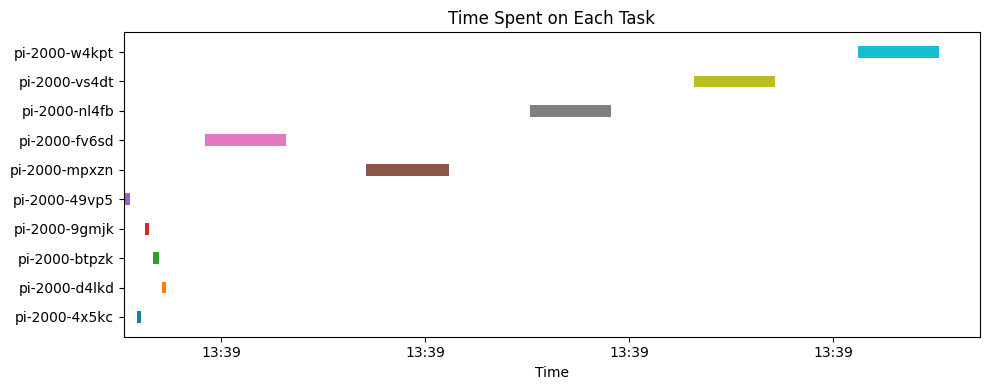

In [46]:
# Convert string timestamps to datetime objects and compute durations (in hours)
for event in basic_sched_events:
    event["end_dt"] = datetime.fromisoformat(event["eventTime"])
    event["duration"] = timedelta(microseconds= int(event['metadata']['annotations']['scheduler/nanoseconds']) / 1000)
    #event["start_dt"] = event["end_dt"] - duration_td

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot each scheduling event as a horizontal bar
for i, event in enumerate(basic_sched_events):
    ax.barh(i, event["duration"], left = event["end_dt"] - event["duration"], height=0.4, align='center')

# Set y-axis with component names
ax.set_yticks(range(len(basic_sched_events)))
ax.set_yticklabels([event["involvedObject"]["name"] for event in basic_sched_events])

# Format the x-axis to show time (using hours and minutes)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xlabel("Time")
plt.title("Time Spent on Each Task")
plt.tight_layout()
plt.show()


In [47]:
[(event["involvedObject"]["name"], event['metadata']['annotations']['scheduler/nanoseconds']) for event in basic_sched_events]

[('pi-2000-4x5kc', '9770466'),
 ('pi-2000-d4lkd', '9416321'),
 ('pi-2000-btpzk', '15735623'),
 ('pi-2000-9gmjk', '10172188'),
 ('pi-2000-49vp5', '15930092'),
 ('pi-2000-mpxzn', '203398785'),
 ('pi-2000-fv6sd', '199072436'),
 ('pi-2000-nl4fb', '198053678'),
 ('pi-2000-vs4dt', '198580562'),
 ('pi-2000-w4kpt', '199814210')]

In [48]:
[(event["involvedObject"]["name"], event['eventTime']) for event in basic_sched_events]

[('pi-2000-4x5kc', '2025-04-02T13:39:56.801929Z'),
 ('pi-2000-d4lkd', '2025-04-02T13:39:56.863755Z'),
 ('pi-2000-btpzk', '2025-04-02T13:39:56.846991Z'),
 ('pi-2000-9gmjk', '2025-04-02T13:39:56.821919Z'),
 ('pi-2000-49vp5', '2025-04-02T13:39:56.777267Z'),
 ('pi-2000-mpxzn', '2025-04-02T13:39:57.559035Z'),
 ('pi-2000-fv6sd', '2025-04-02T13:39:57.158605Z'),
 ('pi-2000-nl4fb', '2025-04-02T13:39:57.953773Z'),
 ('pi-2000-vs4dt', '2025-04-02T13:39:58.357796Z'),
 ('pi-2000-w4kpt', '2025-04-02T13:39:58.759133Z')]